In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf
%matplotlib inline

In [3]:
ticker = "TCS.BO"
data = yf.download(ticker, start = '2014-01-01')["Adj Close"]
data

[*********************100%%**********************]  1 of 1 completed


Date
2014-01-01     858.149597
2014-01-02     861.576294
2014-01-03     885.364014
2014-01-06     892.376770
2014-01-07     879.865234
                 ...     
2024-02-05    3972.750000
2024-02-06    4133.450195
2024-02-07    4083.199951
2024-02-08    4135.549805
2024-02-09    4134.250000
Name: Adj Close, Length: 2471, dtype: float64

In [5]:
log_returns = np.log(1 + data.pct_change())
log_returns

Date
2014-01-01         NaN
2014-01-02    0.003985
2014-01-03    0.027235
2014-01-06    0.007890
2014-01-07   -0.014120
                ...   
2024-02-05    0.001612
2024-02-06    0.039654
2024-02-07   -0.012231
2024-02-08    0.012739
2024-02-09   -0.000314
Name: Adj Close, Length: 2471, dtype: float64

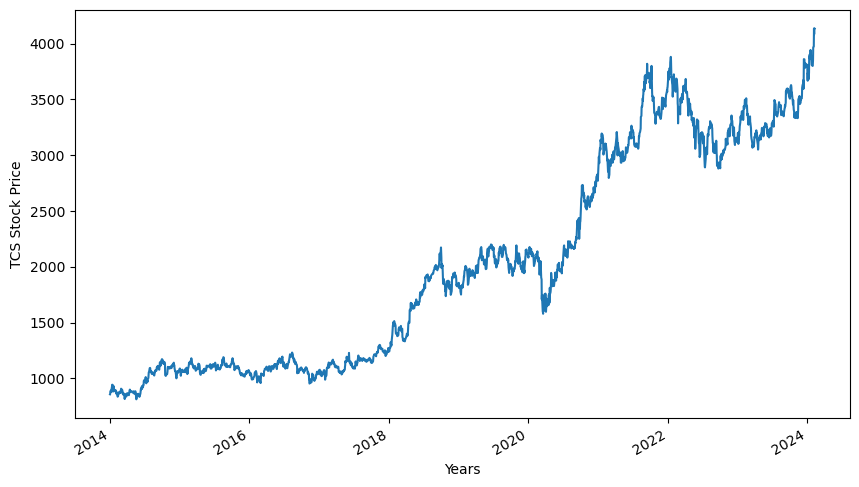

In [8]:
data.plot(figsize = (10,6))
plt.xlabel("Years")
plt.ylabel("TCS Stock Price")
plt.show()

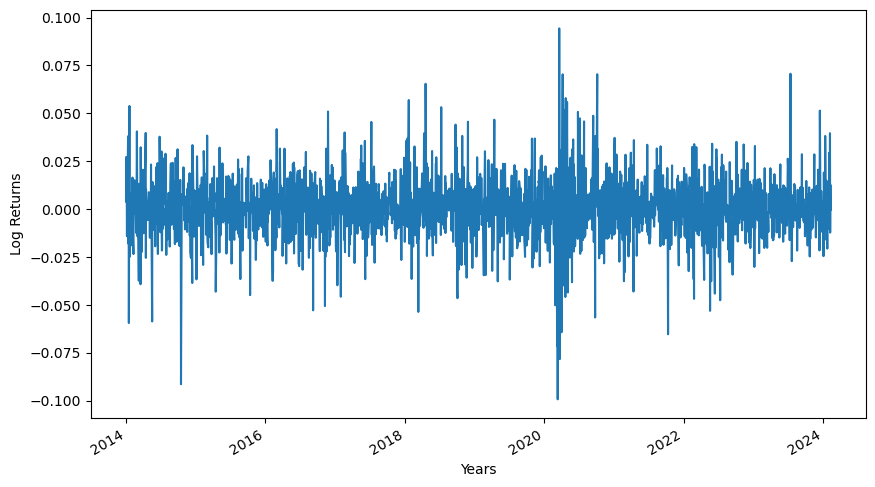

In [10]:
log_returns.plot(figsize = (10,6))
plt.xlabel("Years")
plt.ylabel("Log Returns")
plt.show()

# Drift = u - 0.5 * Var

In [11]:
u = log_returns.mean()
u

0.000636551729784173

In [12]:
var = log_returns.var()
var

0.00022920152577862865

In [13]:
drift = u - 0.5 * var
drift

0.0005219509668948587

In [14]:
stdev = log_returns.std()
stdev

0.015139403085281422

In [16]:
np.array(drift)

array(0.00052195)

# Determining z

In [20]:
norm.ppf(0.95)

1.6448536269514722

In [21]:
x = np.random.rand(10,2)
x

array([[0.75894716, 0.47461651],
       [0.92504382, 0.16732452],
       [0.97771355, 0.89426225],
       [0.35143194, 0.81644385],
       [0.64043067, 0.93093616],
       [0.76326834, 0.51986545],
       [0.16359433, 0.50732485],
       [0.62676148, 0.6071272 ],
       [0.8595992 , 0.96771442],
       [0.07562103, 0.70537938]])

In [22]:
norm.ppf(x)

array([[ 0.7029199 , -0.06366996],
       [ 1.43984113, -0.96479194],
       [ 2.00866287,  1.24951848],
       [-0.3814574 ,  0.90189566],
       [ 0.3596102 ,  1.48279953],
       [ 0.7168554 ,  0.0498159 ],
       [-0.97979231,  0.0183617 ],
       [ 0.32328814,  0.27183929],
       [ 1.07852034,  1.84821561],
       [-1.4351581 ,  0.5399359 ]])

In [23]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-4.59478689e-01, -1.09278273e+00],
       [-4.41198858e-01, -3.85465170e-01],
       [ 9.04223881e-01, -9.71969356e-01],
       [-3.75958346e-01, -1.03726934e+00],
       [-2.17229886e+00,  7.95066254e-01],
       [ 7.05237009e-01, -4.08783971e-01],
       [ 1.54561211e-01, -7.98795332e-01],
       [-2.43088949e-01,  5.95616958e-01],
       [-2.24509811e-04,  7.58370947e-01],
       [-7.84358643e-01,  1.33223468e+00]])

In [24]:
t_intervals = 1000
iterations = 10

# daily_returns = e^y

# r = drift + stdev.z

In [26]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99436565, 1.00025752, 1.00352793, ..., 1.00949498, 1.00373919,
        1.02147404],
       [1.00583278, 1.00689743, 1.00723826, ..., 1.00189407, 1.03890494,
        1.003939  ],
       [1.00849765, 0.997995  , 0.98182005, ..., 0.99778591, 1.00212684,
        0.99671272],
       ...,
       [1.00456862, 1.01981859, 1.0382234 , ..., 0.99559305, 0.99876006,
        0.99869788],
       [1.01300007, 1.01553732, 0.98992785, ..., 0.99634742, 0.98699503,
        1.01792385],
       [0.99543252, 1.00637792, 0.98000427, ..., 1.00946473, 0.97590468,
        0.98244862]])

In [28]:
S0 = data.iloc[-1]
S0

4134.25

In [29]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
price_list[0] = S0
price_list

array([[4134.25, 4134.25, 4134.25, ..., 4134.25, 4134.25, 4134.25],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [   0.  ,    0.  ,    0.  , ...,    0.  ,    0.  ,    0.  ]])

In [32]:
for t in range (1,t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list

array([[4134.25      , 4134.25      , 4134.25      , ..., 4134.25      ,
        4134.25      , 4134.25      ],
       [4158.36419018, 4162.76570564, 4164.17477286, ..., 4142.08057059,
        4295.0927406 , 4150.53479873],
       [4193.70053086, 4154.41936846, 4088.47027485, ..., 4132.90963765,
        4304.22771763, 4136.89081454],
       ...,
       [8636.27741399, 7746.71151081, 6285.66253096, ..., 6284.02937767,
        8794.34873037, 8310.32101459],
       [8748.54959938, 7867.07465118, 6222.35238526, ..., 6261.076487  ,
        8679.97846406, 8459.27395981],
       [8708.59075612, 7917.25020348, 6097.93190866, ..., 6320.33589769,
        8470.83162232, 8310.80205884]])

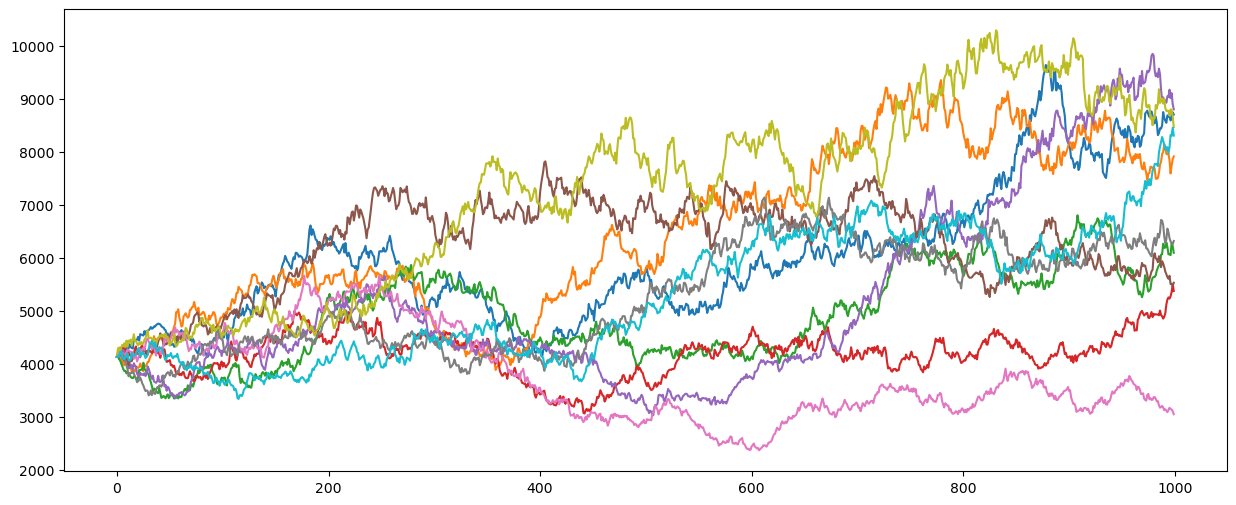

In [34]:
plt.figure(figsize = (15,6))
plt.plot (price_list);